<a href="https://colab.research.google.com/github/Jain-Nishkarsh/SUTT_AI-ML_Task/blob/main/SUTT_AI_ML_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("/content/GPL_Cleaned_Data.csv", index_col=0)
display(data)

,SEX,AGES,CGPA-1,CGPA-2,CLUB/DEPARTMENT,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O?,ATTENDS LECTURES,CHARACTER,...,BIRTHDAY_MONTH,BIRTHDAY_DATE,DAY_OF_WEEK,ADMISSION_MODE_BITSAT,ADMISSION_MODE_BOARD TOPPER,ADMISSION_MODE_DASA,BOARD_STUDIED_CBSE,BOARD_STUDIED_ICSE,BOARD_STUDIED_Other,GPL
0,1,19,8.850000,7.000000,0,12,4,1,0,1,...,4,22,4,1,0,0,1,0,0,0
1,0,21,7.010000,9.000000,0,1,1,1,0,0,...,8,8,4,0,0,1,0,1,0,1
2,0,20,3.000000,8.000000,0,5,4,1,0,0,...,5,5,2,1,0,0,1,0,0,1
3,0,21,6.324711,6.527311,0,7,4,1,0,0,...,10,6,0,0,0,1,1,0,0,1
4,1,21,5.650000,9.000000,0,7,3,1,0,1,...,3,15,5,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1,19,6.020000,3.000000,0,6,0,0,0,0,...,7,16,5,0,1,0,1,0,0,0
1093,0,24,3.570000,6.000000,0,5,2,0,0,0,...,2,3,3,0,1,0,1,0,0,1
1094,0,21,3.710000,5.000000,1,0,4,0,1,1,...,4,12,5,1,0,0,1,0,0,0
1095,1,22,9.680000,5.000000,0,3,3,0,0,0,...,4,25,3,0,0,1,1,0,0,0


# Choosing relevant features

In [3]:
def percentage_for_each_value(feature):
    summary = {}
    for i in data[feature].unique():
        yes = data[data[feature] == i]['GPL'].value_counts()[1] if (1 in data[data[feature] == i]['GPL'].value_counts()) else 0
        no = data[data[feature] == i]['GPL'].value_counts()[0] if (0 in data[data[feature] == i]['GPL'].value_counts()) else 0
        summary[i] = (yes / (yes + no))
    return (summary)

<BarContainer object of 2 artists>

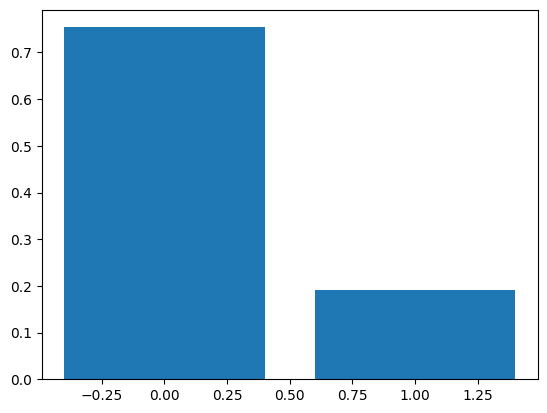

In [4]:
summary = percentage_for_each_value('SEX')
plt.bar(x = summary.keys(), height = summary.values())

# High variation so useful

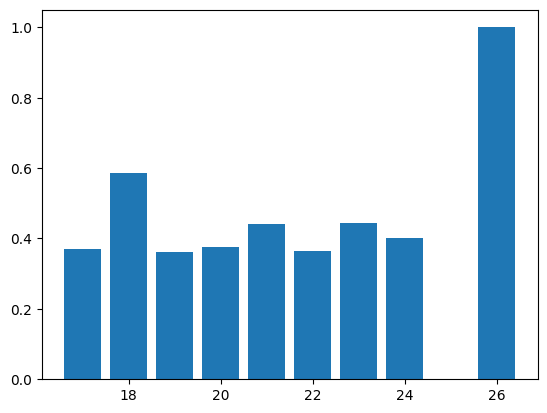

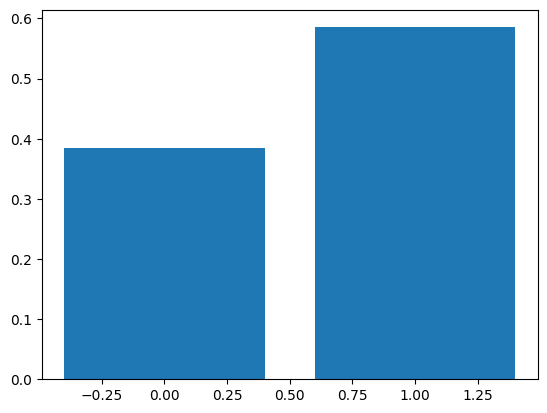

In [5]:
summary = percentage_for_each_value('AGES')
plt.bar(x = summary.keys(), height = summary.values())
plt.show()

#25 and 26 don't help out much here so dropping those rows
data.drop(data[data['AGES'] == 25].index, inplace = True)
data.drop(data[data['AGES'] == 26].index, inplace = True)

#Other than that 18 is an outlier others are about the same.
data['exactly 18yo'] = (data['AGES'] == 18)
data['exactly 18yo'] = data['exactly 18yo'].astype('category').cat.codes

summary = percentage_for_each_value('exactly 18yo')
plt.bar(x = summary.keys(), height = summary.values())
plt.show()

# Created new category for exactly 18 year olds
# Shows that people are more likely to get GPLd on their 18th birthday

<BarContainer object of 16 artists>

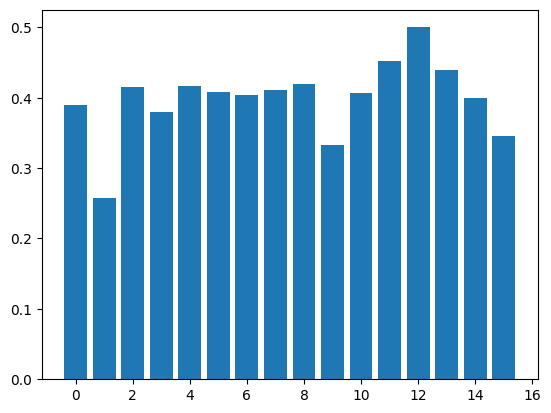

In [6]:
summary = percentage_for_each_value('DAYS SINCE LAST SHOWER')
plt.bar(x = summary.keys(), height = summary.values())

#Very low variation hence this feature is also useless

<BarContainer object of 5 artists>

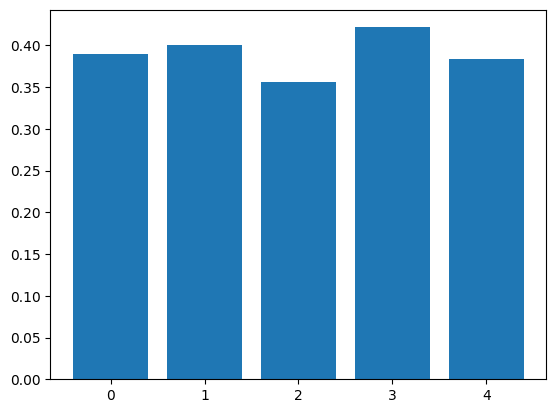

In [7]:
summary = percentage_for_each_value('TREATS GIVEN')
plt.bar(x = summary.keys(), height = summary.values())

#Here also very low variation hence this feature is also useless

<BarContainer object of 2 artists>

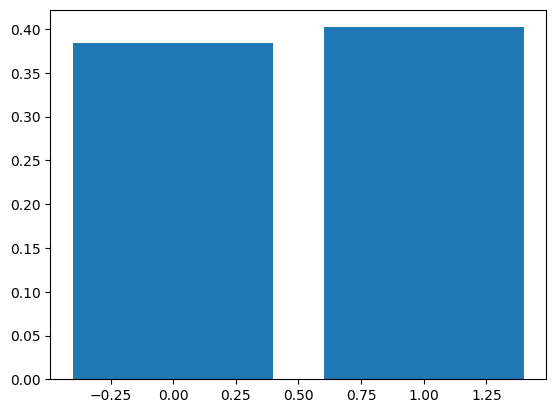

In [8]:
summary = percentage_for_each_value('HAS A S/O?')
plt.bar(x = summary.keys(), height = summary.values())

#Here also very low variation hence this feature is also useless

<BarContainer object of 5 artists>

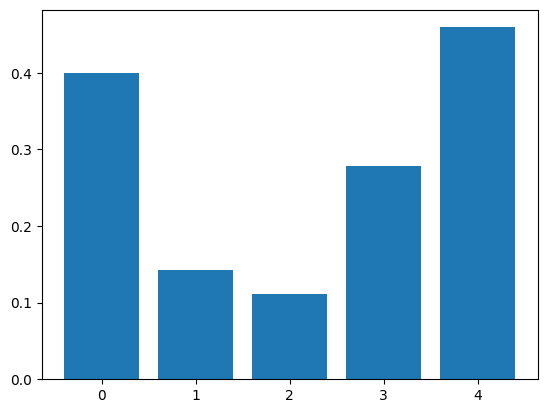

In [9]:
summary = percentage_for_each_value('CLUB/DEPARTMENT')
plt.bar(x = summary.keys(), height = summary.values())

#Here also significant variation hence this feature is useful

<BarContainer object of 2 artists>

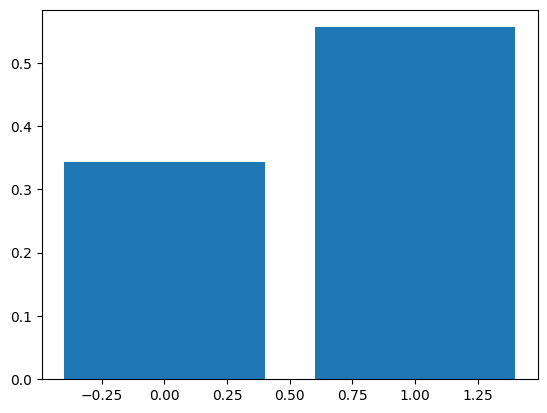

In [10]:
summary = percentage_for_each_value('ATTENDS LECTURES')
plt.bar(x = summary.keys(), height = summary.values())

# Significant variance so useful

<BarContainer object of 2 artists>

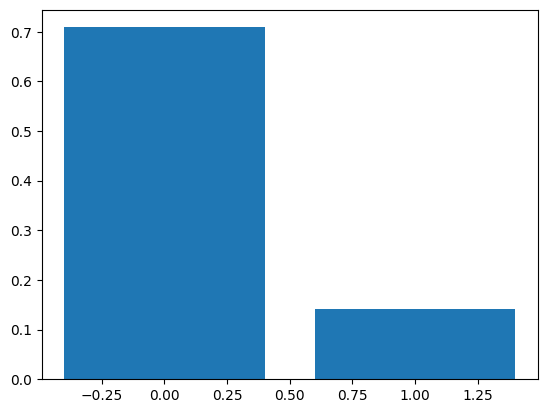

In [11]:
summary = percentage_for_each_value('CHARACTER')
plt.bar(x = summary.keys(), height = summary.values())

# HUGE. Very Useful.

<BarContainer object of 7 artists>

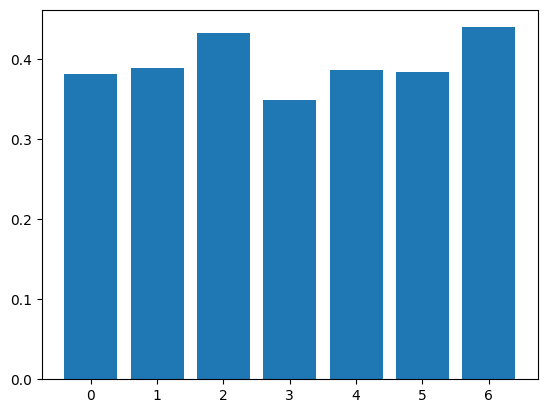

In [12]:
summary = percentage_for_each_value('DAY_OF_WEEK')
plt.bar(x = summary.keys(), height = summary.values())

#Here also very low variation hence this feature is also useless

<BarContainer object of 2 artists>

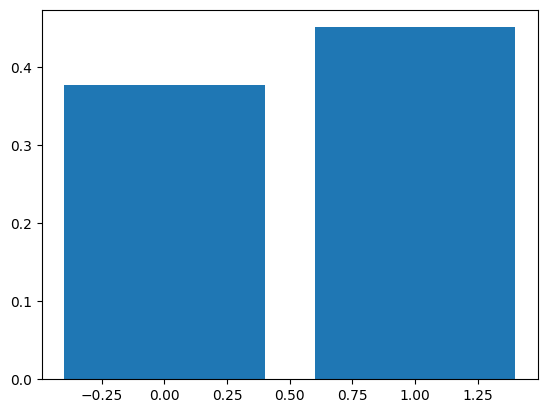

In [13]:
summary = percentage_for_each_value('ADMISSION_MODE_BOARD TOPPER')
plt.bar(x = summary.keys(), height = summary.values())

#Here also very low variation hence this feature is also useless

<BarContainer object of 2 artists>

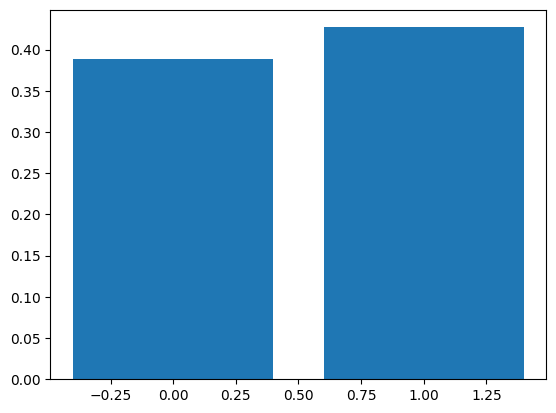

In [14]:
summary = percentage_for_each_value('BOARD_STUDIED_Other')
plt.bar(x = summary.keys(), height = summary.values())

#Here also very low variation hence this feature is also useless

In [15]:
# data.drop(columns=['AGES', 'DAYS SINCE LAST SHOWER', 'TREATS GIVEN', 'HAS A S/O?', 'ADMISSION_MODE_BOARD TOPPER', 'BOARD_STUDIED_Other', 'DAY_OF_WEEK'], inplace=True)
data.drop(columns=['AGES', 'DAYS SINCE LAST SHOWER', 'TREATS GIVEN', 'HAS A S/O?', 'ADMISSION_MODE_BOARD TOPPER', 'DAY_OF_WEEK'], inplace=True)
data.drop(columns=['BIRTHDAY_MONTH', 'BIRTHDAY_DATE'], inplace=True)

In [16]:
print(data[data['GPL'] == 0]['PIZZERIA EXPENDITURE (annual)'].describe())
print(data[data['GPL'] == 1]['PIZZERIA EXPENDITURE (annual)'].describe())

# Data says that the max PIZZERIA EXPENDITURE of GPLd people is less than the min of Non GPLd
# So we techincally need just a 1 or a 0 for PIZZERIA EXPENDITURE being < or > 10k

# Removing Pizzeria expenditure on SPECIAL REQUEST
data.drop(columns=['PIZZERIA EXPENDITURE (annual)'], inplace=True)

count      661.000000
mean     16153.004539
std       3028.294430
min      10019.000000
25%      13559.000000
50%      16030.000000
75%      18842.000000
max      21981.000000
Name: PIZZERIA EXPENDITURE (annual), dtype: float64
count     427.000000
mean     4863.590164
std      1960.555394
min       106.000000
25%      3522.000000
50%      4844.000000
75%      6301.500000
max      8966.000000
Name: PIZZERIA EXPENDITURE (annual), dtype: float64


(array([ 72.,  62., 103., 156., 185., 159., 142., 106.,  61.,  42.]),
 array([3.   , 3.697, 4.394, 5.091, 5.788, 6.485, 7.182, 7.879, 8.576,
        9.273, 9.97 ]),
 <BarContainer object of 10 artists>)

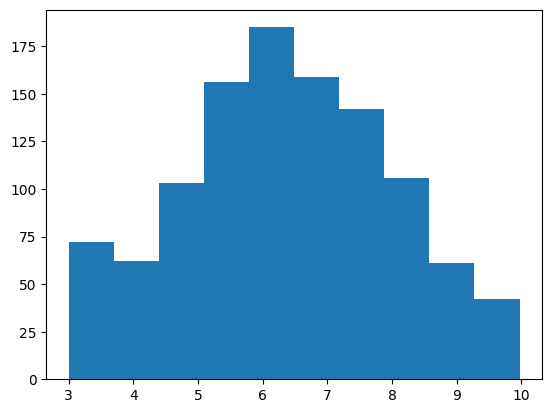

In [17]:
plt.hist(data['CGPA-1'])

(array([128., 128., 120.,   0., 153., 148.,   0., 117., 139., 155.]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <BarContainer object of 10 artists>)

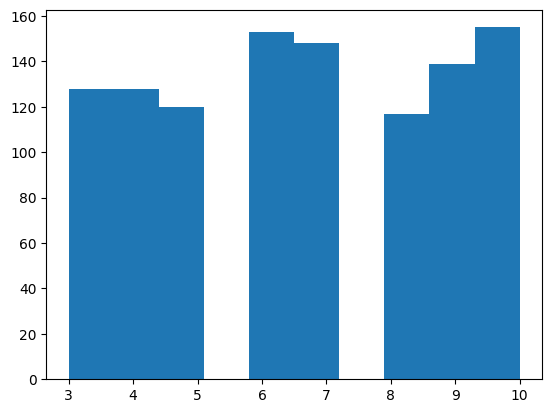

In [18]:
plt.hist(data['CGPA-2'])

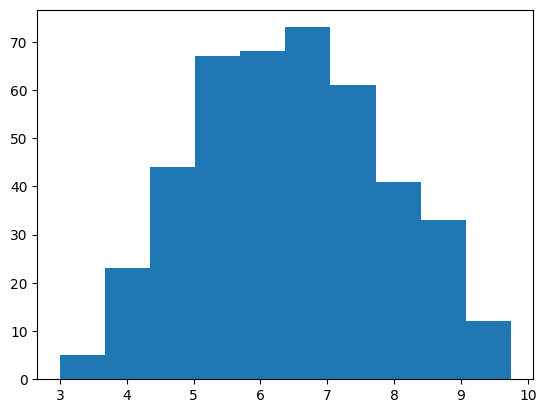

In [19]:
plt.hist((data[data['GPL'] == 1]['CGPA-1'] + data[data['GPL'] == 1]['CGPA-2']) / 2)
plt.show()

In [20]:
# plt.hist((data[data['GPL'] == 1]['CGPA-1'] * data[data['GPL'] == 1]['CGPA-2']) ** 0.5)
# plt.show()
# plt.hist((data[data['GPL'] == 0]['CGPA-1'] * data[data['GPL'] == 0]['CGPA-2']) ** 0.5)
# plt.show()

In [21]:
#New feature for representing CGPA (temp. for now)
data['CompiledCGPA'] = (data['CGPA-1'] + data['CGPA-2']) / 2
data.drop(columns=['CGPA-1', 'CGPA-2'], inplace=True)

In [22]:
print(data[data['GPL'] == 0]['GRAMS / MONTH'].describe())
print(data[data['GPL'] == 1]['GRAMS / MONTH'].describe())
print(data['GRAMS / MONTH'].describe())

count    661.000000
mean       5.567020
std        3.205081
min        0.300000
25%        2.600000
50%        5.600000
75%        8.400000
max       11.000000
Name: GRAMS / MONTH, dtype: float64
count    427.000000
mean       0.327635
std        0.119603
min        0.150000
25%        0.200000
50%        0.300000
75%        0.450000
max        0.500000
Name: GRAMS / MONTH, dtype: float64
count    1088.000000
mean        3.510754
std         3.576899
min         0.150000
25%         0.400000
50%         1.800000
75%         6.500000
max        11.000000
Name: GRAMS / MONTH, dtype: float64


# Standardization and Normalization

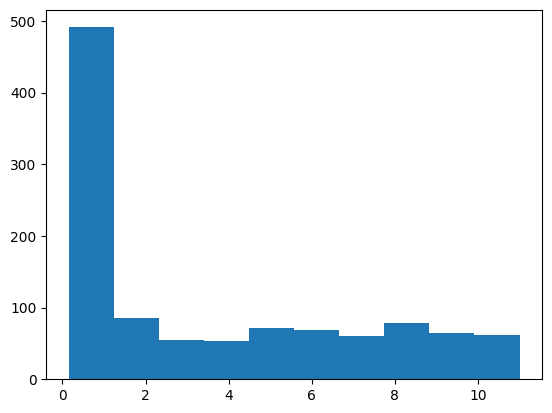

In [23]:
# Normalizing the GRAMS/MONTH feature since the distribution is far from Normal
plt.hist(data['GRAMS / MONTH'])
plt.show()

min = data['GRAMS / MONTH'].min()
max = data['GRAMS / MONTH'].max()

data['GRAMS / MONTH'] = (data['GRAMS / MONTH'] - min) / (max - min)

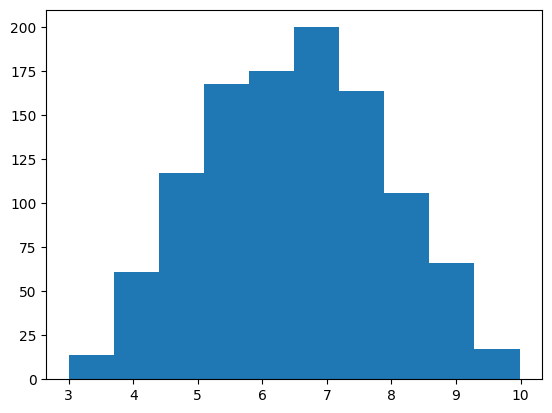

In [24]:
# Standardizing CompiledCGPA since it follows a roughly normal distribution
plt.hist(data['CompiledCGPA'])
plt.show()

mean = data['CompiledCGPA'].mean()
std = data['CompiledCGPA'].std()

data['CompiledCGPA'] = (data['CompiledCGPA'] - mean) / std

In [25]:
# One-hot encoding CLUB/DEPARTMENT
data = data.join(pd.get_dummies(data['CLUB/DEPARTMENT'], prefix='CLUB/DEPARTMENT')).drop(columns=['CLUB/DEPARTMENT'])

In [26]:
#Rearranging GPL to the end for aesthetics
cols = list(data.columns.values)
cols.remove('GPL')
cols.append('GPL')
data = data[cols]

# Final Data

In [27]:
data.dtypes

SEX                        int64
ATTENDS LECTURES           int64
CHARACTER                  int64
GRAMS / MONTH            float64
ADMISSION_MODE_BITSAT      int64
ADMISSION_MODE_DASA        int64
BOARD_STUDIED_CBSE         int64
BOARD_STUDIED_ICSE         int64
BOARD_STUDIED_Other        int64
exactly 18yo                int8
CompiledCGPA             float64
CLUB/DEPARTMENT_0          uint8
CLUB/DEPARTMENT_1          uint8
CLUB/DEPARTMENT_2          uint8
CLUB/DEPARTMENT_3          uint8
CLUB/DEPARTMENT_4          uint8
GPL                        int64
dtype: object

In [28]:
display(data)

,SEX,ATTENDS LECTURES,CHARACTER,GRAMS / MONTH,ADMISSION_MODE_BITSAT,ADMISSION_MODE_DASA,BOARD_STUDIED_CBSE,BOARD_STUDIED_ICSE,BOARD_STUDIED_Other,exactly 18yo,CompiledCGPA,CLUB/DEPARTMENT_0,CLUB/DEPARTMENT_1,CLUB/DEPARTMENT_2,CLUB/DEPARTMENT_3,CLUB/DEPARTMENT_4,GPL
0,1,0,1,0.447005,1,0,1,0,0,0,1.028072,1,0,0,0,0,0
1,0,0,0,0.004608,0,1,0,1,0,0,1.085387,1,0,0,0,0,1
2,0,0,0,0.013825,1,0,1,0,0,0,-0.709288,1,0,0,0,0,1
3,0,0,0,0.004608,0,1,1,0,0,0,-0.045859,1,0,0,0,0,1
4,1,0,1,0.769585,1,0,1,0,0,0,0.598210,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1,0,0,0.345622,0,0,1,0,0,0,-1.418560,1,0,0,0,0,0
1093,0,0,0,0.013825,0,0,1,0,0,0,-1.221540,1,0,0,0,0,1
1094,0,1,1,0.483871,1,0,1,0,0,0,-1.529608,0,1,0,0,0,0
1095,1,0,0,0.788018,0,1,1,0,0,0,0.608957,1,0,0,0,0,0


In [29]:
data.to_csv('/content/GPL_final_data.csv', sep=',')